In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [5]:
df = pd.read_csv('prices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


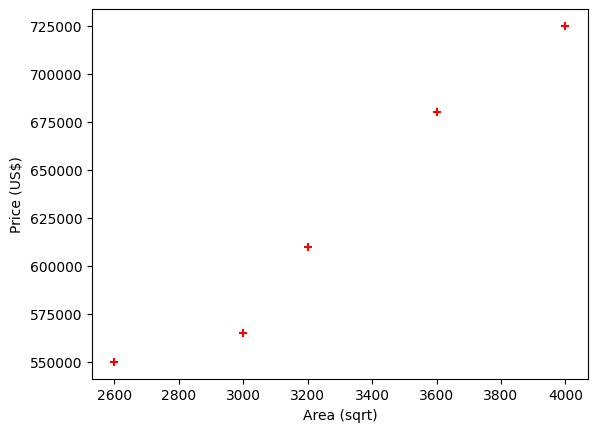

In [11]:
%matplotlib inline
plt.scatter(df.area, df.price, color='red', marker='+')
plt.xlabel('Area (sqrt ft)')
plt.ylabel('Price (US$)')
plt.show()

In [21]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df['price'])

LinearRegression()

In [22]:
reg.predict(pd.DataFrame([[3300]], columns=['area']))

array([628715.75342466])

In [24]:
df['area']

0    2600
1    3000
2    3200
3    3600
4    4000
Name: area, dtype: int64

In [27]:
reg.coef_ # value of m

array([135.78767123])

In [30]:
reg.intercept_ # value of b

np.float64(180616.43835616432)

In [31]:
m = reg.coef_[0]
b = reg.intercept_
x = 3300
y = m*x + b
y

np.float64(628715.7534246575)

In [33]:
df_areas = pd.read_csv('area.csv')
df_areas.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [35]:
predicted_prices = reg.predict(df_areas)

In [36]:
df_areas['price'] = predicted_prices

In [37]:
df_areas.head()

,area,price
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794521
4,4120,740061.643836


In [39]:
df_areas.to_csv('predicted_prices.csv', index=False)

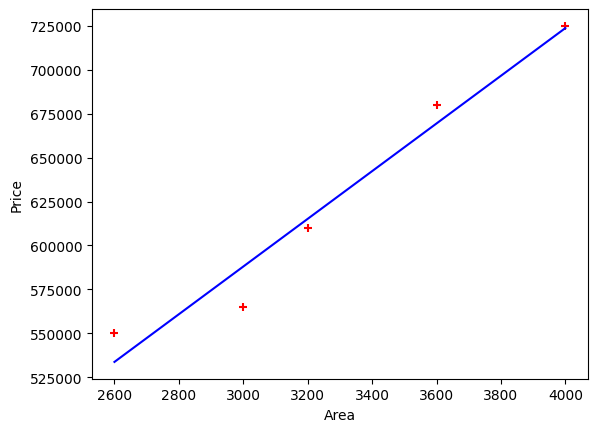

In [48]:
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [67]:
df_canada = pd.read_csv('canada_per_capita_income.csv')
df_canada.tail()

,year,per capita income (US$)
42,2012,42665.25597
43,2013,42676.46837
44,2014,41039.89360
45,2015,35175.18898
46,2016,34229.19363


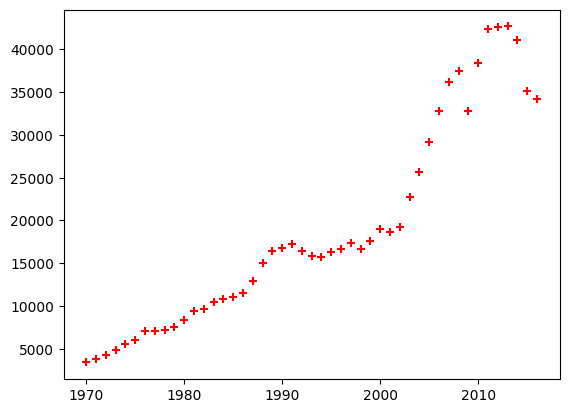

In [57]:
plt.scatter(df_canada['year'], df_canada['per capita income (US$)'], color='red', marker='+')

In [60]:
reg = linear_model.LinearRegression()
reg.fit(df_canada[['year']], df_canada['per capita income (US$)'])

LinearRegression()

In [64]:
reg.predict(pd.DataFrame([[2020]], columns=['year']))

array([41288.69409442])